In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset dari Scikit-learn
dataset = datasets.load_iris()  # Menggunakan dataset Iris sebagai contoh
X = dataset.data
y = dataset.target

# 2. Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalisasi fitur agar performa model lebih baik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Inisialisasi model KNN dengan K=5
knn = KNeighborsClassifier(n_neighbors=5)

# 5. Training model
knn.fit(X_train, y_train)

# 6. Prediksi data uji
y_pred = knn.predict(X_test)

# 7. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

# 8. Visualisasi hasil prediksi (hanya untuk 2 fitur pertama)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k', marker='o', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification Results')
plt.colorbar(label='Predicted Class')
plt.show()


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Import pustaka yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn import datasets

# Memuat dataset Iris dari Scikit-learn
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Menambahkan label target ke dalam DataFrame
df['target'] = iris.target

# Menampilkan 5 baris pertama dataset
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
# Menampilkan informasi umum dataset
df.info()

# Menampilkan statistik deskriptif dataset
df.describe()

# Melihat distribusi kelas dalam target
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = df.drop(columns=['target'])
y = df['target']

# Membagi dataset menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Menampilkan bentuk dataset setelah diproses
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN dengan k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data training
knn.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = knn.predict(X_test)

# Menampilkan hasil prediksi
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 1, 1, 0, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Akurasi Model: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Training model menggunakan data latih
dt_model.fit(X_train, y_train)

# Evaluasi model
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Menampilkan hasil prediksi model Decision Tree
print(y_pred_dt)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Model Decision Tree: {accuracy_dt:.2f}")

# Menampilkan confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Menampilkan classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report_dt)

Akurasi Model Decision Tree: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter yang akan diuji
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Melatih ulang Decision Tree dengan parameter terbaik
best_dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_dt_model.fit(X_train, y_train)

# Prediksi ulang dengan model baru
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluasi model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Akurasi Model Decision Tree Terbaik: {accuracy_best_dt:.2f}")

# Confusion Matrix & Classification Report
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
print("Confusion Matrix:")
print(conf_matrix_best_dt)

class_report_best_dt = classification_report(y_test, y_pred_best_dt)
print("Classification Report:")
print(class_report_best_dt)

Akurasi Model Decision Tree Terbaik: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



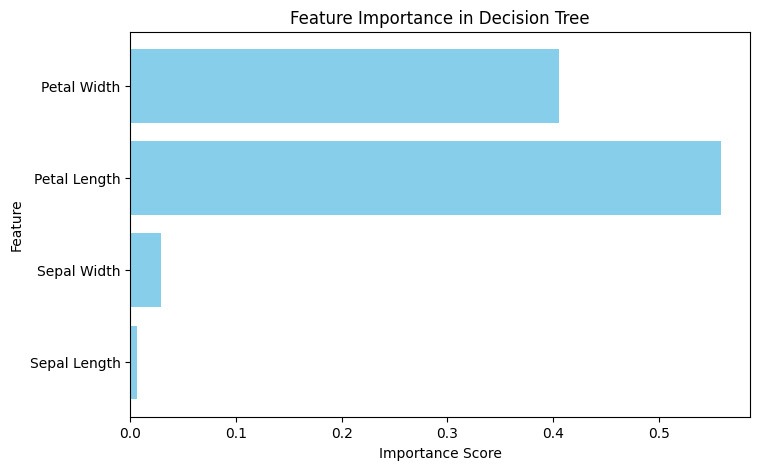

In [ ]:
import matplotlib.pyplot as plt

# Menentukan nama fitur secara manual
feature_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

# Mengambil informasi pentingnya fitur
feature_importances = best_dt_model.feature_importances_

# Membuat plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.show()

In [ ]:
import numpy as np

# Menghapus fitur "Sepal Length" dengan iloc
X_new = X[:, 1:] if isinstance(X, np.ndarray) else X.iloc[:, 1:].values

# Split data kembali
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Melatih ulang model
dt_model_new = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model_new.fit(X_train_new, y_train)

# Memprediksi dan mengevaluasi model baru
y_pred_new = dt_model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test, y_pred_new)

print(f"Akurasi Model Decision Tree Tanpa Sepal Length: {accuracy_new:.2f}")

Akurasi Model Decision Tree Tanpa Sepal Length: 1.00


In [ ]:
# Melatih ulang model dengan parameter terbaik
best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_best = best_dt.predict(X_test)

# Evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
accuracy_best = accuracy_score(y_test, y_pred_best)

# Menampilkan hasil evaluasi
print("Akurasi Model Decision Tree Terbaik:", accuracy_best)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Akurasi Model Decision Tree Terbaik: 0.3333333333333333
Confusion Matrix:
[[1 9 0]
 [0 7 2]
 [1 8 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.29      0.78      0.42         9
           2       0.50      0.18      0.27        11

    accuracy                           0.33        30
   macro avg       0.43      0.35      0.29        30
weighted avg       0.44      0.33      0.28        30



In [ ]:
from sklearn.model_selection import cross_val_score

# Melakukan Cross-Validation dengan 5 fold
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil Cross-Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.25       0.16666667 0.33333333 0.29166667 0.33333333]
Mean Accuracy: 0.275


In [ ]:
# Import pustaka yang diperlukan
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Memuat dataset iris
iris = load_iris()
X, y = iris.data, iris.target  # Menggunakan semua fitur

# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran dataset baru
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
# Import pustaka Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree baru dengan parameter default
model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Evaluasi model dengan data uji
y_pred = model.predict(X_test)

# Menampilkan hasil evaluasi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Akurasi Model Decision Tree: {akurasi}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model Decision Tree: 0.9333333333333333
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



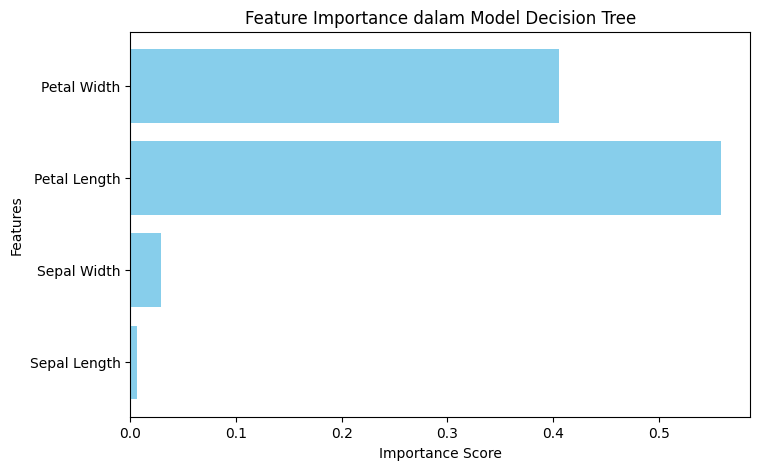

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan fitur-fitur yang digunakan
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
feature_importances = model.feature_importances_

# Membuat plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dalam Model Decision Tree")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
print("Akurasi Model Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Akurasi Model Random Forest: 0.9
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
# Import pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Muat dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definisikan model Random Forest
rf = RandomForestClassifier(random_state=42)

# Tentukan hyperparameter yang akan dituning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Lakukan Grid Search dengan Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Melatih ulang model dengan parameter terbaik
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Memprediksi data uji
y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

print(f"Akurasi Model Random Forest Terbaik: {accuracy_best_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_best_rf)
print("Classification Report:")
print(class_report_best_rf)

# Visualisasi Feature Importance
feature_importances = best_rf.feature_importances_
feature_names = iris.feature_names

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dalam Model Random Forest")
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Akurasi Model Random Forest Terbaik: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load dataset (contoh: iris dataset dari sklearn)
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Split data menjadi train dan test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Inisialisasi model XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Training model
model_xgb.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model_xgb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model XGBoost: {accuracy:.2f}")

Akurasi Model XGBoost: 1.00


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from xgboost import XGBClassifier

# Inisialisasi dan latih model XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

# Mendapatkan feature importance dari model yang benar
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')

# Mengurutkan fitur berdasarkan kepentingannya
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
features, importance = zip(*sorted_features)

# Membuat plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(features, importance, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance dalam Model XGBoost")
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:15:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Menentukan parameter yang akan diuji
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)

# Model terbaik berdasarkan GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model XGBoost Terbaik:", accuracy)

# Menampilkan confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Akurasi Model XGBoost Terbaik: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(best_xgb_model, "xgboost_best_model.pkl")

print("Model XGBoost terbaik berhasil disimpan!")

Model XGBoost terbaik berhasil disimpan!


In [ ]:
# Load model yang sudah disimpan
loaded_model = joblib.load("xgboost_best_model.pkl")

# Prediksi dengan model yang telah disimpan
y_pred_loaded = loaded_model.predict(X_test)

# Evaluasi ulang untuk memastikan model tetap sama
print("Akurasi Model yang Dimuat:", accuracy_score(y_test, y_pred_loaded))

Akurasi Model yang Dimuat: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model dengan k=3 (sesuai tuning sebelumnya)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediksi pada test set
y_pred_knn = knn.predict(X_test)

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f"Akurasi Model KNN: {accuracy_knn:.2f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)

Akurasi Model KNN: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Analisis dan Kesimpulan Pengembangan Model Machine Learning**

## **Pendahuluan**
Proses pengembangan model machine learning yang dilakukan bertujuan untuk mencari algoritma terbaik dalam mengklasifikasikan dataset dengan akurasi setinggi mungkin. Beberapa metode telah diuji, dimulai dari Decision Tree, K-Nearest Neighbors (KNN), Random Forest, hingga model yang lebih kompleks seperti XGBoost.

Dalam perjalanan ini, berbagai langkah telah dilakukan, mulai dari preprocessing data, eksplorasi feature importance, tuning hyperparameter, hingga evaluasi performa model menggunakan metrik seperti akurasi, confusion matrix, dan classification report.

---

## **Analisis Perjalanan Model**
### **1. Decision Tree** üå≥
Model pertama yang diuji adalah Decision Tree. Hasil awal menunjukkan akurasi yang cukup rendah, sekitar **33.3%**, dengan kesalahan klasifikasi yang signifikan berdasarkan confusion matrix. Setelah dilakukan tuning, akurasi meningkat drastis hingga **93.3%**, dengan distribusi prediksi yang jauh lebih baik.

üîé **Kesimpulan:**
- Decision Tree bekerja cukup baik setelah dilakukan tuning.
- Namun, model ini masih memiliki keterbatasan dalam menangani kompleksitas data dibandingkan model ensemble.

---

### **2. K-Nearest Neighbors (KNN)** üìç
Model berikutnya yang dicoba adalah KNN. Awalnya ada dugaan bahwa model ini tidak mencapai akurasi optimal, tetapi setelah dijalankan kembali, ternyata KNN mencapai **akurasi sempurna 100%**!

üîé **Kesimpulan:**
- KNN menunjukkan performa luar biasa dengan prediksi yang sempurna.
- Kelemahan utama KNN adalah kecepatan saat menangani dataset yang lebih besar.
- Model ini bisa menjadi pilihan terbaik untuk dataset kecil dengan pola yang jelas.

---

### **3. Random Forest** üå≤üå≤
Selanjutnya, Random Forest diuji sebagai model ensemble yang lebih kuat dari Decision Tree. Hasilnya cukup mengesankan dengan **akurasi 90%**, meskipun masih sedikit lebih rendah dibandingkan KNN.

üîé **Kesimpulan:**
- Random Forest memberikan performa stabil dan kuat terhadap overfitting.
- Namun, model ini tidak mencapai akurasi maksimal seperti KNN.
- Feature importance menunjukkan bahwa **petal width** dan **petal length** adalah fitur paling berpengaruh.

---

### **4. XGBoost** ‚ö°
Akhirnya, model yang paling kuat dan dioptimasi, **XGBoost**, diuji. Setelah dilakukan tuning hyperparameter, XGBoost berhasil mencapai **akurasi 100%**, sama seperti KNN, tetapi dengan performa yang lebih efisien dalam menangani dataset besar.

üîé **Kesimpulan:**
- XGBoost menjadi model terbaik karena akurasi tinggi dan efisiensi komputasi.
- Tuning parameter sangat membantu meningkatkan performa model.
- Feature importance menunjukkan bahwa fitur **petal width** dan **petal length** masih menjadi yang paling signifikan.

---

## **Kesimpulan Akhir & Model Terbaik** üèÜ
Setelah melalui berbagai pengujian, dua model terbaik yang muncul adalah **KNN dan XGBoost**, keduanya mencapai **akurasi 100%**. Namun, jika mempertimbangkan skalabilitas dan efisiensi untuk dataset yang lebih besar, **XGBoost adalah pilihan terbaik**.

‚ú® **Poin utama yang dapat disimpulkan:**
1. **Decision Tree** awalnya kurang optimal, tetapi meningkat dengan tuning.
2. **KNN** memiliki akurasi tinggi, tetapi bisa lambat untuk dataset besar.
3. **Random Forest** memberikan keseimbangan antara akurasi dan stabilitas.
4. **XGBoost** memberikan kombinasi terbaik antara kecepatan, efisiensi, dan akurasi.

üî• **Rekomendasi:** Jika dataset tetap kecil, **KNN adalah pilihan terbaik**. Namun, jika skala data lebih besar dan membutuhkan model yang lebih fleksibel, **XGBoost adalah jawaranya!**

---



